### Import libs

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read Data

In [31]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)

### Take first look at data

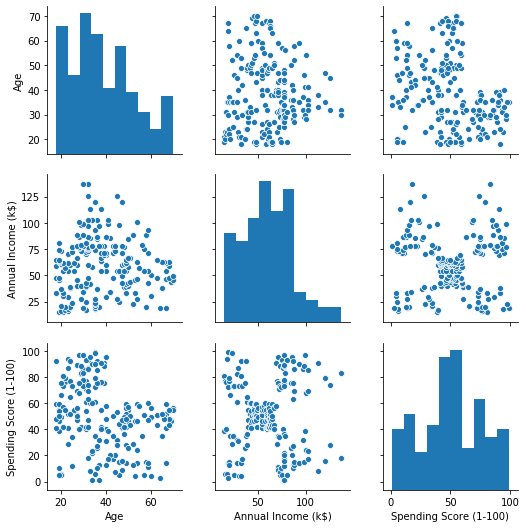

In [32]:
seaborn.pairplot(df);

Only Annual income and Spending score plot has some non-nise like info.Idea is: If somebody earns more money, he can spend more money. Lets check it!

Rename columns

In [34]:
df.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Score'}, inplace=True)

Scalling, because we can!

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['Income','Score']]

In [38]:
X_scaled = scaler.fit_transform(X)

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Here I try silhuette from this article https://itnan.ru/post.php?c=1&p=467745

In [40]:
km_silhouette = []

for i in range(2,9):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)

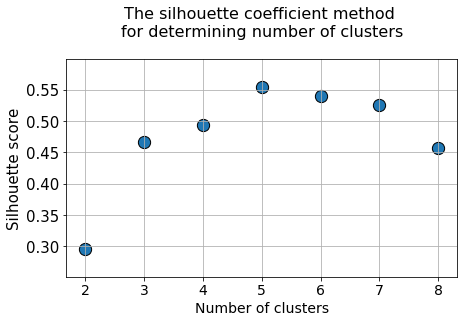

In [42]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,9)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,9)],fontsize=14)
plt.yticks(fontsize=15);

And elbow method from this https://habr.com/en/company/ods/blog/325654/

Some formulas for distance to center of cluster

$$J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k||^{2} \rightarrow \min\limits_C$$

And for slope. Where slope starts to change not so fast, thats shows number of clusters

$$D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|} \rightarrow \min\limits_k$$

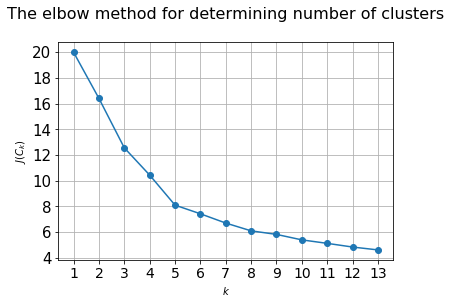

In [14]:
inertia = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.grid(True)
plt.plot(range(1, 14), inertia, marker='o');
plt.xticks([i for i in range(1,14)],fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Prepare some dendrogram with number of clusters = 5

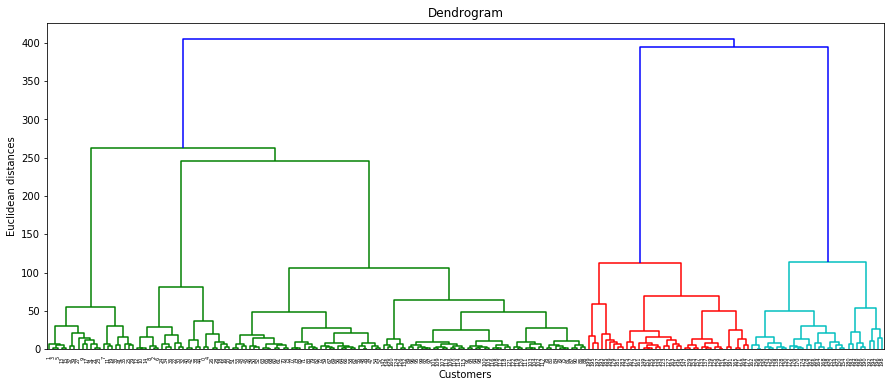

In [28]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

With help of Agglomerative clustering we get labels for our data and add them to dataset

In [16]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_pred = ag.fit_predict(X_scaled)

In [45]:
df['Label'] = y_pred

In [46]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Create scatterplot for our distribution

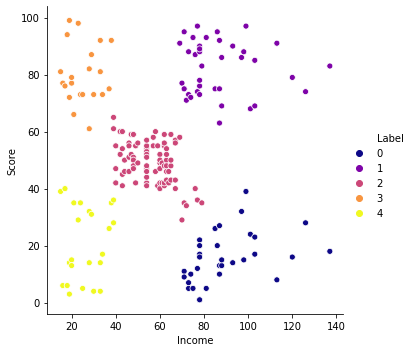

In [49]:
seaborn.relplot(x= 'Income', y='Score', hue='Label', data=df, palette='plasma',legend="full");

We got 5 clusters: <br> 0 - High Income, Low Spending Score.
                   <br>1 - High Income, High Spending Score.
                   <br>2 - Awerage Income, Awerage Spending Score.
                   <br>3 - Low Income, High Spending Scoreg Score.
                   <br>4 - Low Income, Low Spending Score